How does SVM compare to other ML algorithms?


SVM - support vector machines are a form of supervised machine learning 

Artificial neural networls - ANNs by their model mimics the human brain structure 

- as a rule of thumb, SVMs are great for relatively small data sets with few outliers 
- Other algos (Random forests, deep neural networks etc.) require more data but produce highly robust 
- The decision pf wwhich classifier to use depends on your dataset and the general complexity of the problem 


What is SVM?

- It is a form of supervised ML, which can be used for both classification issues and regression problems.
- It is usually used for classification. Given 2 or more labeled classes of data, it acts as a discriminative classifier formaly defined by an optimal hyperplane that seperates all the classes. New examples that are then mapped into that same space can then be categorised based on which side of the gap they fall in.
- Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a dataset, they are what helps us build our SVM  

What is a Hyperplane?

- A hyperplane is a linear decision that splits the space into two parts; 
- It is obvious that a hyperplane is a binary classifier 
- Geometry tells us that a hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of n-dimensional space is a flat subset with dimension n-1. By its naturem, it separates the space into two half spaces 

Linear vs nonlinear classification? 

- sometomes our data is linearly seperable. That means for N classes with M features, we can learn a mapping that is a linear combination e.g. y= mx + b. Or even a multidimensional hyperplane (y = x + z + b + q). No matter how many dimensions/ features a set of classes have, we can represent the mapping using a linear function 

But sometimes its not. For example if there was a quadratic mapping. Luckily for us SVMs can efficiently perform a non-linear classification using what is called the kernel trick 

In [1]:
# To help perform mathematical operations import numpy 
import numpy as np 
# to plot data and model visual impor matplotlib 
from matplotlib import pyplot as plt 
%matplotlib inline 

In [2]:
# Step 1 - define data 

# Input data - in the form of X Values and Y Values 

X = np.array([[-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1]])

In [3]:
# associated output labels - First 2 examples are labeled '-1' and the last 3 are labeled '+1'

y = np.array ([-1, -1, 1,1,1])

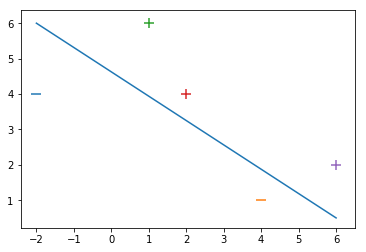

In [4]:
# Time to plot the examples in 2d 

for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    #Plot the positive samples (the last 3)
    
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

#Print a possible hyperplane, that is seperating the two classes 
# We will ise the two points and draw a line between them (naive guess)

plt.plot([-2,6], [6,0.5])

Defining the loss function - what to minimise, and defining the objective function - what to optimise 

Loss function:

the function used in this ecxample will be Hinge loss. This is a loss function used for training classifiers. The hinge loss is used for 'maximum-margin' classification, most notably for SVMs 

c(x, y, f(x)) = (1 - y * f(x)) 

C is the loss function, x the sample, y is the true lable. F(x) the predicted lable 

This means the following: 

c(x, y, f(x)) = {0 if y * f(x) >= 1, else 1 - y * f(x)}

Objective Function: 

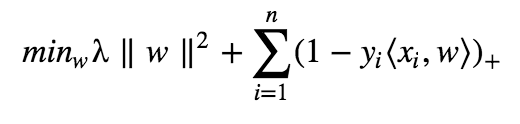

As it can be seen, the objective of SVM consists of two terms. The first is a regulaiser, the heart of the SVM. The second is the loss. The regulariser balances between margin maximisation and loss. We want to find the decision surface that is maximally far away from any data points. 

How do we minimise our loss/ optimise for our objective? 

We have tp derive our objective function to get the gradients!This is known as gradient descent. As we have two terms, we will derive them seperately using the sum rule differentiation. 

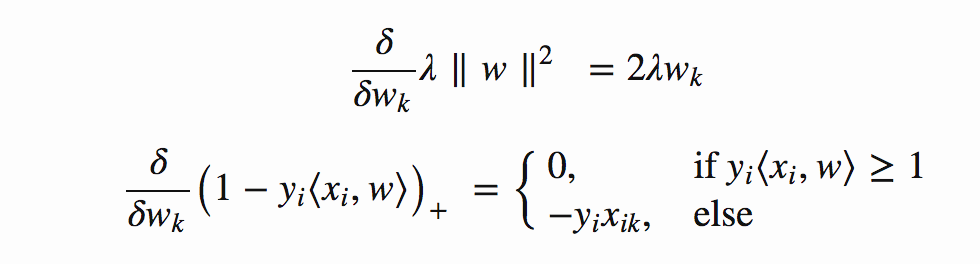


This means, if we have misclassified sample, we update the weight vector w using the gradients of both terms, else if classified we just update the gradient of the regulariser 

Misclassification condition
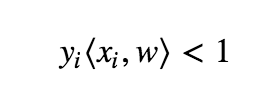


Updated rule for our weights (misclassified) 

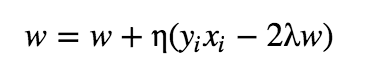

Including the learning rate η and the regularizer λ. The learning rate is the length of the steps the algorithm makes down the gradient error curve

- learning rate too high? The algorithm might overshoot the optimal point 
- Learning rate too low? Could take too long to converge. or never converge

The regulariser controls the trade off between the achieving a low training error and a low testing error that is the ability to generalise your classifier to unseen data. As a regularising parameter we choose 1/epochs, so this parameter will decrease, as the number of epochs increases. 

- Regulariser too high? overfit (large testing error)
- Regulariser too low? underfit (large training error) 

Update rule for our weights (correctly classified)

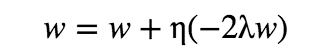

In [18]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w
                


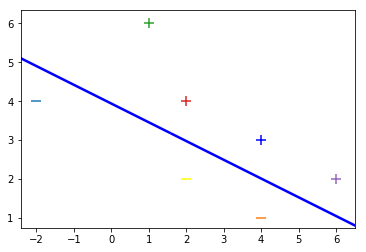

In [19]:
for d, sample in enumerate(X): 
    # plot the negative samples 
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker= '_', linewidths=2)
    #plot the positive samples 
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
#Add test samples , 
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by SVM_sgd()

x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

C:\Users\jonathanw\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


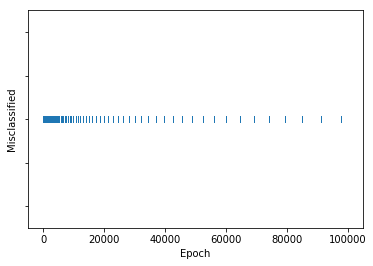

In [17]:
w = svm_sgd_plot(X,y)


The number of errors can be seen to be decreasigng over time 